# Dimensionality Reduction with Autoencoders
### Tensorflow | Keras

__

**Práctica de Reducción de las Dimensiones con Autoencoders**



___

## Data

In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UK_foods.csv')

In [3]:
df

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


In [4]:
df = pd.read_csv('UK_foods.csv', index_col='Unnamed: 0')

In [5]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [6]:
df.shape

(17, 4)

In [7]:
df = df.transpose()

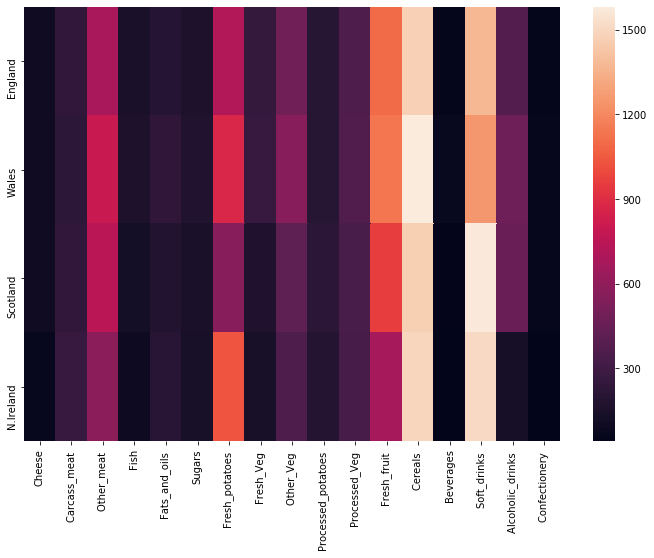

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df);

___

## Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [10]:
#encoder = Sequential()
#encoder.add(Dense(17, input_shape=[4,17], activation='relu'))
#encoder.add(Dense(8, activation='relu'))
#encoder.add(Dense(4, activation='relu'))
#encoder.add(Dense(2, activation='relu'))

encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [11]:


decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [12]:
autoencoder = Sequential([encoder, decoder])

In [13]:
autoencoder.compile(loss='mse',
                   optimizer=SGD(lr=1.5),
                   metrics=['accuracy'])

#### Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
df.shape

(4, 17)

In [17]:
scaled_data = scaler.fit_transform(df.values)

In [18]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [19]:
scaled_data.shape

(4, 17)

In [20]:
autoencoder.fit(scaled_data, scaled_data, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 239ms/step - loss: 0.4251 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.2500
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.2500
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.2500
Epoch 5/15
1/1 [==============================] - 0s 1000us/step - loss: 0.2439 - accuracy: 0.2500
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.2500
Epoch 7/15
1/1 [==============================] - 0s 998us/step - loss: 0.2347 - accuracy: 0.2500
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.2500
Epoch 9/15
1/1 [==============================] - 0s 998us/step - loss: 0.2273 - accuracy: 0.2500
Epoch 10/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.2500
Epoch 11/15
1/1 [=========

### Now we grab the encoder and predict on the same scaled data to get less dimensions

In [40]:
reduced = encoder.predict(scaled_data)

In [41]:
reduced

array([[0.42461377, 0.        ],
       [0.9715837 , 0.        ],
       [0.2703634 , 0.        ],
       [0.02342921, 0.        ]], dtype=float32)

In [23]:
reduced.shape

(4, 2)

In [24]:
df.shape

(4, 17)

In [42]:
reduced_df = pd.DataFrame(reduced, columns=['C1', 'C2'])

In [43]:
reduced_df

,C1,C2
0,0.424614,0.0
1,0.971584,0.0
2,0.270363,0.0
3,0.023429,0.0


In [44]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [45]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [46]:
reduced_df.index

RangeIndex(start=0, stop=4, step=1)

In [47]:
reduced_df.index = ['England', 'Wales', 'Scotland', 'N.Ireland']

In [48]:
reduced_df

,C1,C2
England,0.424614,0.0
Wales,0.971584,0.0
Scotland,0.270363,0.0
N.Ireland,0.023429,0.0


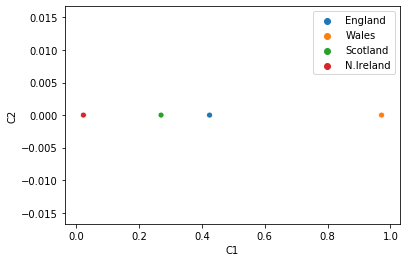

In [49]:
sns.scatterplot(data=reduced_df, x='C1', y='C2', hue=reduced_df.index);